In [ ]:
#Import necessary libraries
import re
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import  accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
chatgpt=pd.read_csv("Chatgpt_twitter_analysis.csv")

In [ ]:
chatgpt.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
chatgpt.dtypes

Unnamed: 0     int64
tweets        object
labels        object
dtype: object

In [ ]:
print(chatgpt.shape)

(219294, 3)


In [ ]:
print(chatgpt.isna().sum())

Unnamed: 0    0
tweets        0
labels        0
dtype: int64


## Data Preprocessing

In [ ]:
chatgpt = chatgpt[['tweets', 'labels']]

In [ ]:
chatgpt.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
# View the first 10 rows in the tweets column

for i in chatgpt.tweets.head(10):
    print(i)
    print()

ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

As of 2 minutes ago, @OpenAI release

In [ ]:
# Remove all the tweet links since they all begin with https:

chatgpt['tweet_text'] = chatgpt['tweets'].str.split('https:')
chatgpt = chatgpt[['tweet_text', 'labels']]

In [ ]:
chatgpt.head()

,tweet_text,labels
0,[ChatGPT: Optimizing Language Models for Dialo...,neutral
1,"[Try talking with ChatGPT, our new AI system w...",good
2,[ChatGPT: Optimizing Language Models for Dialo...,neutral
3,"[THRILLED to share that ChatGPT, our new model...",good
4,"[As of 2 minutes ago, @OpenAI released their n...",bad


In [ ]:
# View the first 10 rows in the tweets column

for i in chatgpt.tweet_text.head(10):
    print(i)


['ChatGPT: Optimizing Language Models for Dialogue ', '//t.co/K9rKRygYyn @OpenAI']
['Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. ', '//t.co/sHDm57g3Kr']
['ChatGPT: Optimizing Language Models for Dialogue ', '//t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\\n\\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer ', '//t.co/RprmAXUp34']
['THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. ', '//t.co/dyvtHecYbd ', '//t.co/DdhzhqhCBX ', '//t.co/l8qTLure71']
['As of 2 minutes ago, @OpenAI released their new ChatGPT. \\n\\nAnd you can use it right now 👇 ', '//t.co/VyPGPNw988 ', '//t.co/cSn5h6h1M1']
['Just launched ChatGPT, our new AI system which is optimized for dialogue: ', '//t.co/ArX6m0FfLE.\\n\\nTry it out here: ', '//t.co/YM1gp5bA64']
['As of 2 minutes ago, @OpenAI rel

In [ ]:
text = [i[0] for i in chatgpt.tweet_text]

In [ ]:
# Remove all non-alphanumeric characters from the text list
string = r'[A-Za-z0-9 ]'

trim_list=[]

for row in text:
    s=''
    for letter in row:
        if bool(re.match(string, letter)):
            s+=letter
    trim_list.append(s)

In [ ]:
# Remove the non-printing characters from text

rep_list = ['\U0001fae1', '\\n', '@', '#', '\xa0', '***']

for i in trim_list:
    for j in rep_list:
        if j in i:
            i.replace(j,'')

In [ ]:
chatgpt['tweet_text'] = trim_list

In [ ]:
# View the first 10 rows in the tweets column

for i in chatgpt.tweet_text.head(10):
    print(i)


ChatGPT Optimizing Language Models for Dialogue 
Try talking with ChatGPT our new AI system which is optimized for dialogue Your feedback will help us improve it 
ChatGPT Optimizing Language Models for Dialogue 
THRILLED to share that ChatGPT our new model optimized for dialog is now public free and accessible to everyone 
As of 2 minutes ago OpenAI released their new ChatGPT nnAnd you can use it right now  
Just launched ChatGPT our new AI system which is optimized for dialogue 
As of 2 minutes ago OpenAI released their new ChatGPT nnAnd you can use it right now n n
ChatGPT coming out strong refusing to help me stalk someone but agreeing providing that someone is Waldo 
0penAl just deployed a thing Ive been helping build the last couple of months its a chatbot based on GPT 3 Im really excited to share this vln
Research preview of our newest model ChatGPTnnWere trying something new with this preview Free and immediately available for everyone no waitlist 


In [ ]:
chatgpt.head()

,tweet_text,labels
0,ChatGPT Optimizing Language Models for Dialogue,neutral
1,Try talking with ChatGPT our new AI system whi...,good
2,ChatGPT Optimizing Language Models for Dialogue,neutral
3,THRILLED to share that ChatGPT our new model o...,good
4,As of 2 minutes ago OpenAI released their new ...,bad


In [ ]:
chatgpt['lab_int'] = np.where(chatgpt['labels']=='good', 1, np.where(chatgpt['labels']=='bad', -1, 0))
chatgpt['labels']=chatgpt['lab_int']
chatgpt = chatgpt[['tweet_text', 'labels']]

## Feature Extraction

In [ ]:
# Bag of Words representation
count_vectorizer = CountVectorizer()
bow_vectors = count_vectorizer.fit_transform(chatgpt['tweet_text'])

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(chatgpt['tweet_text'])

# n-Grams representation
ngram_vectorizer = CountVectorizer(ngram_range=(1,2)) # 1to 2 gram representation
ngram_vectors = ngram_vectorizer.fit_transform(chatgpt['tweet_text'])

In [ ]:
# Print the vocabulary size for each representation
print("Bag of Words Vocabulary Size:", len(count_vectorizer.vocabulary_))
print("TF-IDF Vocabulary Size:", len(tfidf_vectorizer.vocabulary_))
print("n-Grams Vocabulary Size:", len(ngram_vectorizer.vocabulary_))

Bag of Words Vocabulary Size: 162551
TF-IDF Vocabulary Size: 162551
n-Grams Vocabulary Size: 1238589


In [ ]:
chatgpt.head()

,tweet_text,labels
0,ChatGPT Optimizing Language Models for Dialogue,0
1,Try talking with ChatGPT our new AI system whi...,1
2,ChatGPT Optimizing Language Models for Dialogue,0
3,THRILLED to share that ChatGPT our new model o...,1
4,As of 2 minutes ago OpenAI released their new ...,-1


## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy - Bag of Words: 0.8502017829863882
Confusion Matrix:
[[20068  1144   262]
 [ 1869  7930  1382]
 [  557  1356  9291]]


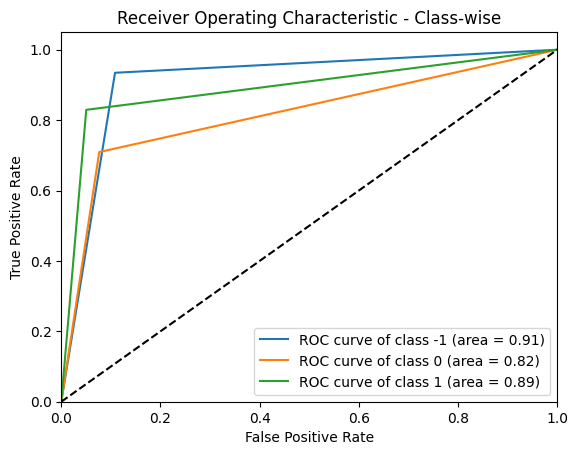

Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.93      0.91     21474
           0       0.76      0.71      0.73     11181
           1       0.85      0.83      0.84     11204

    accuracy                           0.85     43859
   macro avg       0.83      0.82      0.83     43859
weighted avg       0.85      0.85      0.85     43859



In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(bow_vectors, chatgpt['labels'], test_size=0.2, random_state=42)

# Initialize and train logistic regression models
logreg_bow = LogisticRegression()
logreg_bow.fit(X_train_bow, y_train)

# Evaluate the models
accuracy_log_bow = logreg_bow.score(X_test_bow, y_test)
preds_log_bow = logreg_bow.predict(X_test_bow)
print("Accuracy - Bag of Words:", accuracy_log_bow)

# Confusion matrix
cm = confusion_matrix(y_test, preds_log_bow)
print("Confusion Matrix:")
print(cm)

# Separate ROC curves for each class
classes = [-1, 0, 1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in classes:
    y_test_binary = (y_test == c).astype(int)
    preds_log_binary = (preds_log_bow == c).astype(int)
    fpr[c], tpr[c], _ = roc_curve(y_test_binary, preds_log_binary)
    roc_auc[c] = auc(fpr[c], tpr[c])

# Plot ROC curves for each class
plt.figure()

for c in classes:
    plt.plot(fpr[c], tpr[c], label='ROC curve of class {0} (area = {1:0.2f})'.format(c, roc_auc[c]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, preds_log_bow))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy - TF-IDF: 0.8141316491484074
Confusion Matrix:
[[20365   803   306]
 [ 2777  6691  1713]
 [  855  1698  8651]]


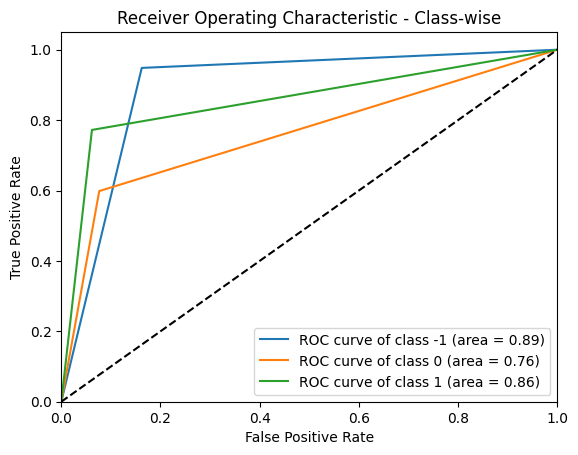

Classification Report:
              precision    recall  f1-score   support

          -1       0.85      0.95      0.90     21474
           0       0.73      0.60      0.66     11181
           1       0.81      0.77      0.79     11204

    accuracy                           0.81     43859
   macro avg       0.80      0.77      0.78     43859
weighted avg       0.81      0.81      0.81     43859



In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_vectors, chatgpt['labels'], test_size=0.2, random_state=42)

# Initialize and train logistic regression models
logreg_tfidf = LogisticRegression()
logreg_tfidf.fit(X_train_tfidf, y_train)

# Evaluate the model
accuracy_log_tfidf = logreg_tfidf.score(X_test_tfidf, y_test)
preds_log_tfidf = logreg_tfidf.predict(X_test_tfidf)
print("Accuracy - TF-IDF:", accuracy_log_tfidf)

# Confusion matrix
cm = confusion_matrix(y_test, preds_log_tfidf)
print("Confusion Matrix:")
print(cm)

# Separate ROC curves for each class
classes = [-1, 0, 1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in classes:
    y_test_binary = np.where(y_test == c, 1, 0)
    preds_log_binary = np.where(preds_log_tfidf == c, 1, 0)
    fpr[c], tpr[c], _ = roc_curve(y_test_binary, preds_log_binary)
    roc_auc[c] = auc(fpr[c], tpr[c])

# Plot ROC curves for each class
plt.figure()

for c in classes:
    plt.plot(fpr[c], tpr[c], label='ROC curve of class {0} (area = {1:0.2f})'.format(c, roc_auc[c]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, preds_log_tfidf))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy - n-Grams: 0.8309582981828131


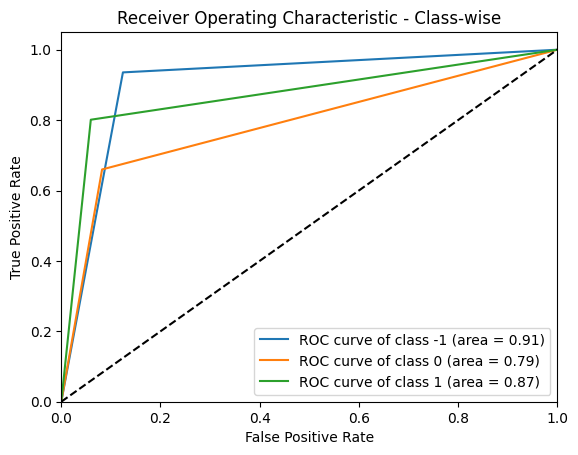

Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.94      0.91     21474
           0       0.73      0.66      0.69     11181
           1       0.82      0.80      0.81     11204

    accuracy                           0.83     43859
   macro avg       0.81      0.80      0.80     43859
weighted avg       0.83      0.83      0.83     43859



In [ ]:
# Split the dataset into training and testing sets
X_train_ngram, X_test_ngram, y_train, y_test = train_test_split(ngram_vectors, chatgpt['labels'], test_size=0.2, random_state=42)

# Initialize and train logistic regression models
logreg_ngram = LogisticRegression()
logreg_ngram.fit(X_train_ngram, y_train)

# Evaluate the models
accuracy_log_ngram = logreg_ngram.score(X_test_ngram, y_test)
preds_log_ngram = logreg_ngram.predict(X_test_ngram)
print("Accuracy - n-Grams:", accuracy_log_ngram)

# Separate ROC curves for each class
classes = [-1, 0, 1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in classes:
    y_test_binary = np.where(y_test == c, 1, 0)
    preds_log_binary = np.where(preds_log_ngram == c, 1, 0)
    fpr[c], tpr[c], _ = roc_curve(y_test_binary, preds_log_binary)
    roc_auc[c] = auc(fpr[c], tpr[c])

# Plot ROC curves for each class
plt.figure()

for c in classes:
    plt.plot(fpr[c], tpr[c], label='ROC curve of class {0} (area = {1:0.2f})'.format(c, roc_auc[c]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, preds_log_ngram))

## Naive Bayes

Accuracy - bag of words: 0.8340239974919486
              precision    recall  f1-score   support

          -1       0.81      0.88      0.85     21474
           0       0.60      0.33      0.43     11181
           1       0.63      0.80      0.71     11204

    accuracy                           0.72     43859
   macro avg       0.68      0.67      0.66     43859
weighted avg       0.71      0.72      0.70     43859



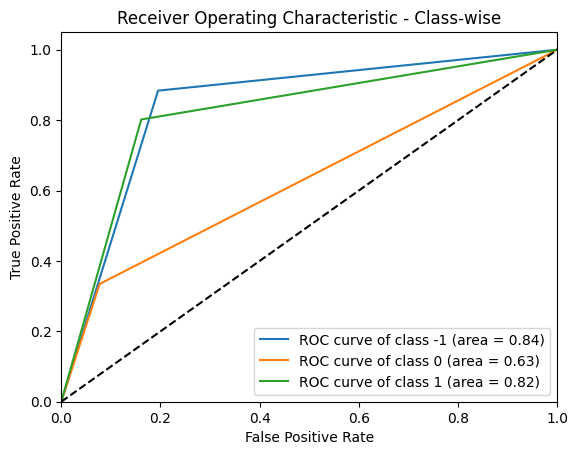

Confusion Matrix:
[[18977  1245  1252]
 [ 3429  3740  4012]
 [  939  1281  8984]]


In [ ]:
# Initialize and train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)

# Calculate accuracy on the testing set
accuracy_nv_bow = nb.score(X_train_bow, y_train)

# Make predictions on the testing set
preds_nv_bow = nb.predict(X_test_bow)

# Print accuracy and classification report
print("Accuracy - bag of words:", accuracy_nv_bow)
print(classification_report(y_test, preds_nv_bow))

# Compute ROC curve and ROC area for each class
classes = [-1, 0, 1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in classes:
    y_test_binary = np.where(y_test == c, 1, 0)
    preds_nv_binary = np.where(preds_nv_bow == c, 1, 0)
    fpr[c], tpr[c], _ = roc_curve(y_test_binary, preds_nv_binary)
    roc_auc[c] = auc(fpr[c], tpr[c])

# Plot ROC curves for each class
plt.figure()

for c in classes:
    plt.plot(fpr[c], tpr[c], label='ROC curve of class {0} (area = {1:0.2f})'.format(c, roc_auc[c]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, preds_nv_bow)
print("Confusion Matrix:")
print(cm)

Accuracy - tfidf: 0.6507900316924691
              precision    recall  f1-score   support

          -1       0.61      0.99      0.76     21474
           0       0.73      0.14      0.23     11181
           1       0.82      0.52      0.64     11204

    accuracy                           0.65     43859
   macro avg       0.72      0.55      0.54     43859
weighted avg       0.69      0.65      0.59     43859



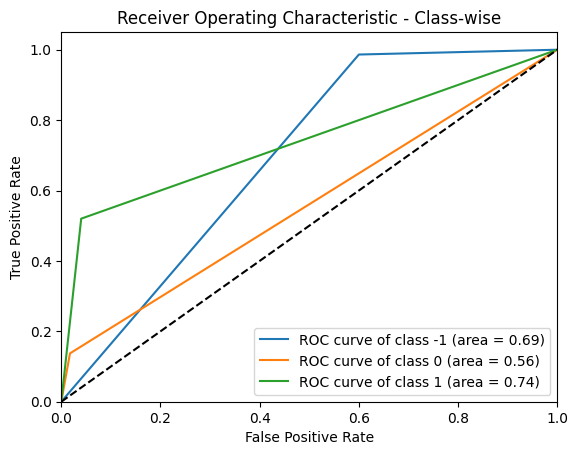

Confusion Matrix:
[[21181   129   164]
 [ 8498  1535  1148]
 [ 4933   444  5827]]


In [ ]:
# Initialize and train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Calculate accuracy on the testing set
accuracy_nv_tfidf = nb.score(X_test_tfidf, y_test)

# Make predictions on the testing set
preds_nv_tfidf = nb.predict(X_test_tfidf)

# Print accuracy and classification report
print("Accuracy - tfidf:", accuracy_nv_tfidf)
print(classification_report(y_test, preds_nv_tfidf))

# Compute ROC curve and ROC area for each class
classes = [-1, 0, 1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in classes:
    y_test_binary = np.where(y_test == c, 1, 0)
    preds_nv_binary = np.where(preds_nv_tfidf == c, 1, 0)
    fpr[c], tpr[c], _ = roc_curve(y_test_binary, preds_nv_binary)
    roc_auc[c] = auc(fpr[c], tpr[c])

# Plot ROC curves for each class
plt.figure()

for c in classes:
    plt.plot(fpr[c], tpr[c], label='ROC curve of class {0} (area = {1:0.2f})'.format(c, roc_auc[c]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, preds_nv_tfidf)
print("Confusion Matrix:")
print(cm)

Accuracy - n-Grams: 0.7193506463895666
              precision    recall  f1-score   support

          -1       0.81      0.87      0.84     21474
           0       0.64      0.33      0.43     11181
           1       0.61      0.82      0.70     11204

    accuracy                           0.72     43859
   macro avg       0.69      0.67      0.66     43859
weighted avg       0.72      0.72      0.70     43859



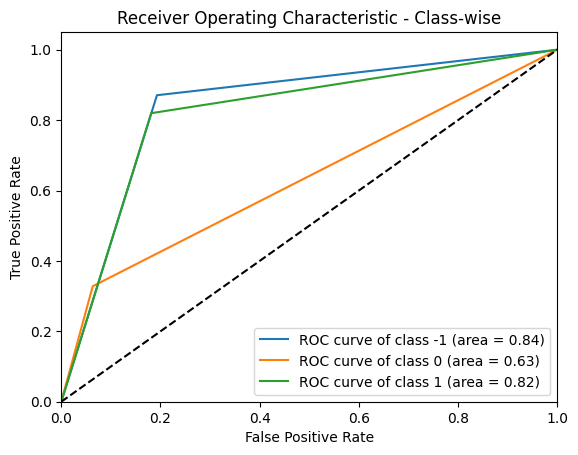

Confusion Matrix:
[[18698  1131  1645]
 [ 3237  3668  4276]
 [ 1080   940  9184]]


In [ ]:
# Initialize and train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_ngram, y_train)

# Calculate accuracy on the testing set
accuracy_nv_ngram = nb.score(X_test_ngram, y_test)

# Make predictions on the testing set
preds_nv_ngram = nb.predict(X_test_ngram)

# Print accuracy and classification report
print("Accuracy - n-Grams:", accuracy_nv_ngram)
print(classification_report(y_test, preds_nv_ngram))

# Compute ROC curve and ROC area for each class
classes = [-1, 0, 1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in classes:
    y_test_binary = np.where(y_test == c, 1, 0)
    preds_nv_binary = np.where(preds_nv_ngram == c, 1, 0)
    fpr[c], tpr[c], _ = roc_curve(y_test_binary, preds_nv_binary)
    roc_auc[c] = auc(fpr[c], tpr[c])

# Plot ROC curves for each class
plt.figure()

for c in classes:
    plt.plot(fpr[c], tpr[c], label='ROC curve of class {0} (area = {1:0.2f})'.format(c, roc_auc[c]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, preds_nv_ngram)
print("Confusion Matrix:")
print(cm)


## Decision Tree

Accuracy - Bag of words: 0.7419457807975558
              precision    recall  f1-score   support

          -1       0.84      0.86      0.85     21474
           0       0.60      0.60      0.60     11181
           1       0.69      0.66      0.68     11204

    accuracy                           0.74     43859
   macro avg       0.71      0.71      0.71     43859
weighted avg       0.74      0.74      0.74     43859



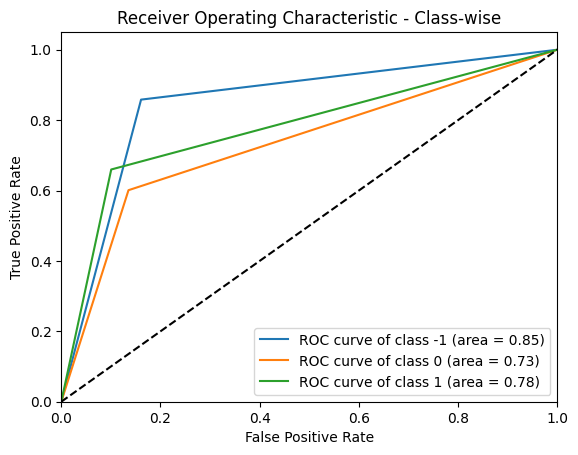

Confusion Matrix:
[[18430  1933  1111]
 [ 2284  6719  2178]
 [ 1317  2495  7392]]


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_bow, y_train)

# Make predictions on the testing set
preds_dt_bow = DT.predict(X_test_bow)

# Accuracy for Test Dataset
accuracy_dt_bow = accuracy_score(y_test, preds_dt_bow)
print("Accuracy - Bag of words:", accuracy_dt_bow)
print(classification_report(y_test, preds_dt_bow))

# Compute ROC curve and ROC area for each class
classes = [-1, 0, 1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in classes:
    y_test_binary = np.where(y_test == c, 1, 0)
    preds_dt_binary = np.where(preds_dt_bow == c, 1, 0)
    fpr[c], tpr[c], _ = roc_curve(y_test_binary, preds_dt_binary)
    roc_auc[c] = auc(fpr[c], tpr[c])

# Plot ROC curves for each class
plt.figure()

for c in classes:
    plt.plot(fpr[c], tpr[c], label='ROC curve of class {0} (area = {1:0.2f})'.format(c, roc_auc[c]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, preds_dt_bow)
print("Confusion Matrix:")
print(cm)

Accuracy - TF-IDF: 0.7276043685446545


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


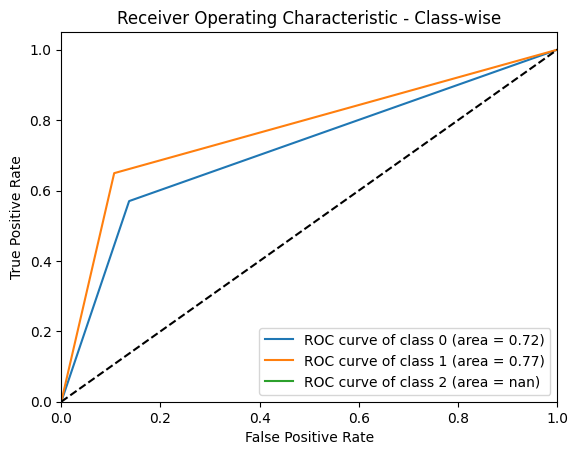

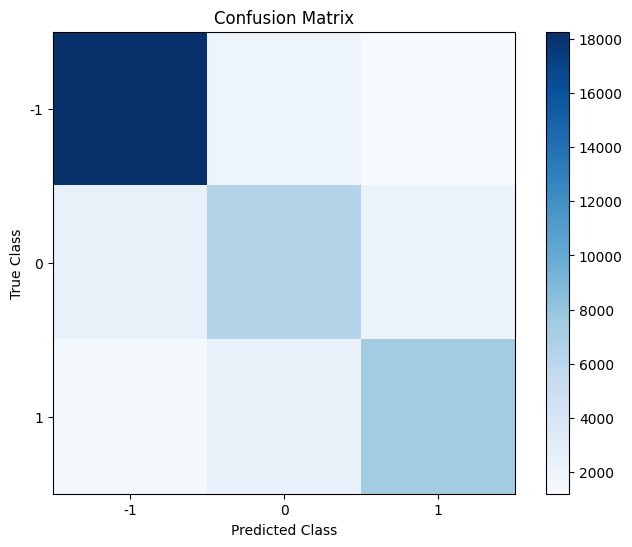

Classification Report:
              precision    recall  f1-score   support

          -1       0.82      0.85      0.84     21474
           0       0.59      0.57      0.58     11181
           1       0.68      0.65      0.66     11204

    accuracy                           0.73     43859
   macro avg       0.69      0.69      0.69     43859
weighted avg       0.72      0.73      0.73     43859



In [ ]:
# Fit the DecisionTreeClassifier on the training data
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
preds_dt_tfidf = dt_classifier.predict(X_test_tfidf)

# Calculate accuracy on the testing set
accuracy_dt_tfidf = accuracy_score(y_test, preds_dt_tfidf)
print("Accuracy - TF-IDF:", accuracy_dt_tfidf)

# Compute ROC curve and ROC area for each class
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_test_binary = np.where(y_test == i, 1, 0)
    preds_dt_binary = np.where(preds_dt_tfidf == i, 1, 0)
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, preds_dt_binary)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, preds_dt_tfidf)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, preds_dt_tfidf))

Due to computational limitations the ROC value for class2 is missing 

Accuracy - n-Grams: 0.7391185389543765


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


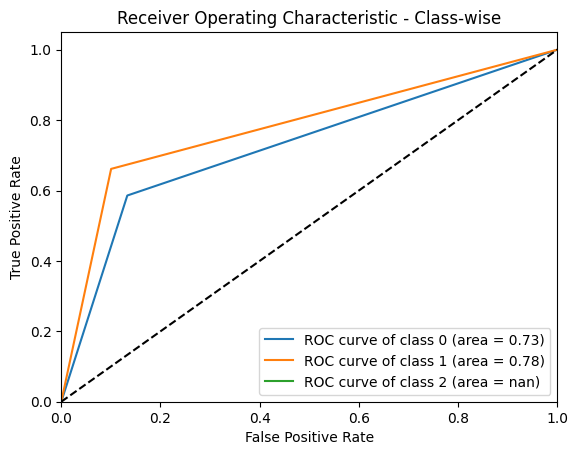

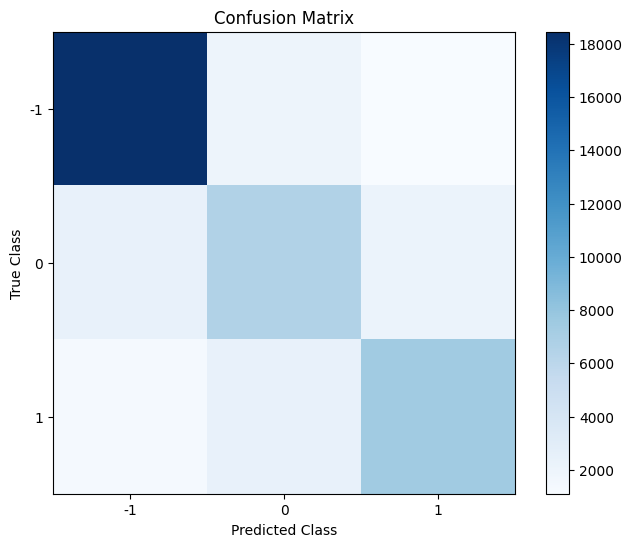

Classification Report:
              precision    recall  f1-score   support

          -1       0.83      0.86      0.84     21474
           0       0.60      0.59      0.59     11181
           1       0.69      0.66      0.68     11204

    accuracy                           0.74     43859
   macro avg       0.71      0.70      0.70     43859
weighted avg       0.74      0.74      0.74     43859



In [ ]:
# Fit the DecisionTreeClassifier on the training data
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_ngram, y_train)

# Make predictions on the testing data
preds_dt_ngram = dt_classifier.predict(X_test_ngram)

# Calculate accuracy on the testing set
accuracy_dt_ngram = accuracy_score(y_test, preds_dt_ngram)
print("Accuracy - n-Grams:", accuracy_dt_ngram)

# Compute ROC curve and ROC area for each class
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_test_binary = np.where(y_test == i, 1, 0)
    preds_dt_binary = np.where(preds_dt_ngram == i, 1, 0)
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, preds_dt_binary)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, preds_dt_ngram)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, preds_dt_ngram))


Due to computational limitations the ROC value for class2 is missing 

## Hyperparameter Tuning(Optional)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default val

[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ..........................................alpha=100; total time=   0.1s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


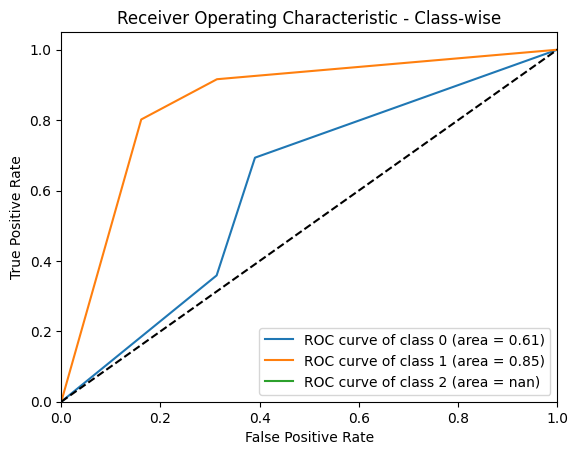

Accuracy: 0.7227934973437606
Precision: [0.81289355 0.59687201 0.63054464]
Recall: [0.88371985 0.33449602 0.80185648]
Confusion Matrix:
[[18977  1245  1252]
 [ 3429  3740  4012]
 [  939  1281  8984]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {"alpha": [0.1, 0, 1.0, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)
grid_search.fit(X_train_bow, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing set
preds = best_model.predict(X_test_bow)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average=None)
recall = recall_score(y_test, preds, average=None)

# Compute confusion matrix
cm = confusion_matrix(y_test, preds)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, preds, pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(cm)

Due to computational limitations the ROC value for class2 is missing 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default val

[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ..........................................alpha=100; total time=   0.1s
[CV] END ..........................................alpha=100; total time=   0.1s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


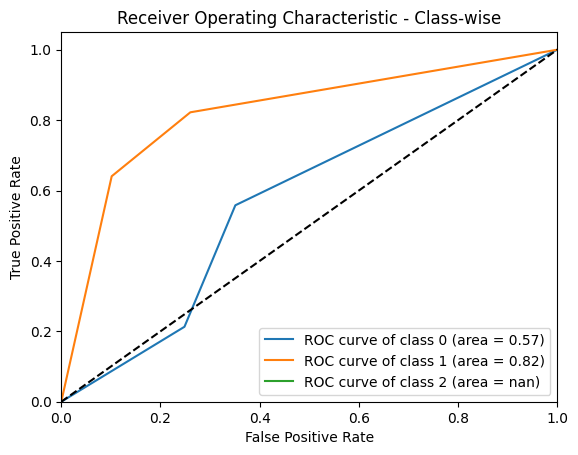

Accuracy: 0.6897786087234091
Precision: [0.73487572 0.53508042 0.68371916]
Recall: [0.89489615 0.34513908 0.64057479]
Confusion Matrix:
[[19217  1318   939]
 [ 4941  3859  2381]
 [ 1992  2035  7177]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {"alpha": [0.1, 0, 1.0, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)
grid_search.fit(X_train_tfidf, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing set
preds = best_model.predict(X_test_tfidf)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average=None)
recall = recall_score(y_test, preds, average=None)

# Compute confusion matrix
cm = confusion_matrix(y_test, preds)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, preds, pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(cm)

Due to computational limitations the ROC value for class2 is missing 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.2s
[CV] END ..........................................alpha=0.1; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


[CV] END ............................................alpha=0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ..........................................alpha=1.0; total time=   0.3s
[CV] END ...........................................alpha=10; total time=   0.3s
[CV] END ...........................................alpha=10; total time=   0.3s
[CV] END ...........................................alpha=10; total time=   0.3s
[CV] END ...........................................alpha=10; total time=   0.3s
[CV] END ...........................................alpha=10; total time=   0.3s
[CV] END ..........................................alpha=100; total time=   0.3s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


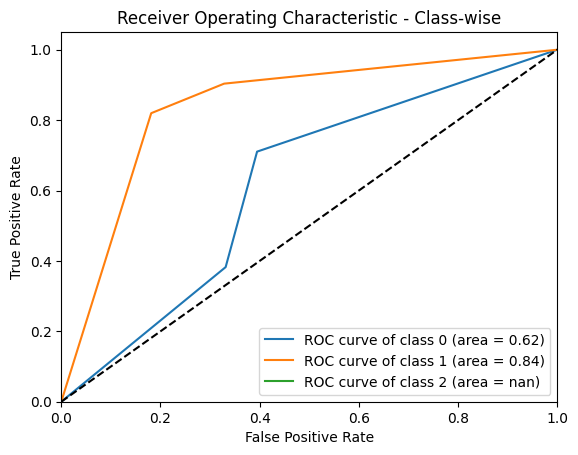

Accuracy: 0.7193506463895666
Precision: [0.81242668 0.63913574 0.60801059]
Recall: [0.87072739 0.32805652 0.81970725]
Confusion Matrix:
[[18698  1131  1645]
 [ 3237  3668  4276]
 [ 1080   940  9184]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {"alpha": [0.1, 0, 1.0, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)
grid_search.fit(X_train_ngram, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing set
preds = best_model.predict(X_test_ngram)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average=None)
recall = recall_score(y_test, preds, average=None)

# Compute confusion matrix
cm = confusion_matrix(y_test, preds)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, preds, pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Class-wise')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(cm)

Due to computational limitations the ROC value for class2 is missing 